# Description: 
### The last time the St Louis Blues were in the NHL Finals, it was 1970 and the Boston Bruins swept them in four games. Bobby Orr was known then but now the Bruins are 27-1 in the playoffs when Brad Marchand scores. I took a look on how keeping him on the ice results in W's. 

In [369]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from matplotlib import rcParams
import cartopy.crs as ccrs
import numpy as np
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [370]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [192]:
df_season = pd.read_csv('marchand_career_season.csv')

In [372]:
df_season['WIN_PERT'] = df_season['WIN_PERT'].astype(int)

In [445]:
df_season['bin'] = pd.cut(df_season['WIN_PERT'], [0, 40, 50, 60, 70], labels=['0-40','40-50','50-60','60-70'])
df_season['bin']

0    40-50
1    50-60
2    50-60
3     0-40
4    60-70
5    40-50
6    50-60
7    50-60
8    60-70
9    50-60
Name: bin, dtype: category
Categories (4, object): [0-40 < 40-50 < 50-60 < 60-70]

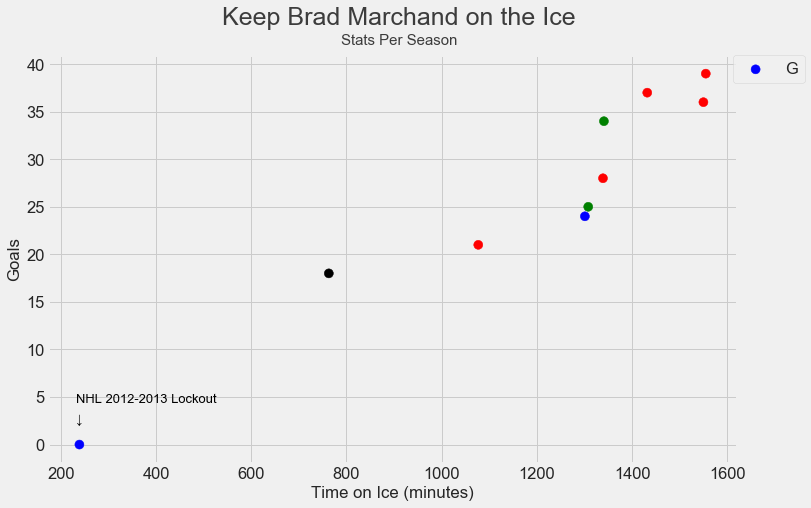

In [573]:
x = df_season['TOI']
y = df_season['G']
c = df_season['bin']
colors = {'0-40':'black', '40-50':'blue', '50-60':'red', '60-70':'green'}

fig, ax = plt.subplots(figsize=(11,7))

plt.scatter(x, y, c=df_season['bin'].apply(lambda x: colors[x]))
plt.style.use('fivethirtyeight')

plt.xlabel('Time on Ice (minutes)')
plt.ylabel('Goals')
fig.text(x=.3, y=.94, s='Keep Brad Marchand on the Ice', fontsize=25, color='#3C3C3C')
fig.text(x=.45, y=.9, s='Stats Per Season', fontsize=15, color='#3C3C3C')
fig.text(x=.115, y=.15, s="↓", fontsize=13, color='#000000')
fig.text(x=.115, y=.19, s="NHL 2012-2013 Lockout", fontsize=13, color='#000000')
ax.legend(bbox_to_anchor=(1.11, 1.02));

In [552]:
maps = pd.read_csv('marchand_lat_long.csv')
maps['Date'] = pd.to_datetime(maps['Date']) 
lat = maps['Lat'].values
lon = maps['Long'].values

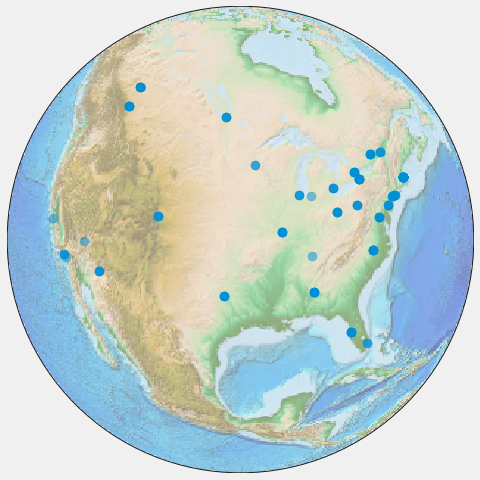

In [571]:
fig = plt.figure(figsize=(8, 8))
h=2000
m = Basemap(projection='nsper', resolution=None, lat_0=38, lon_0=-95, satellite_height=h*1000.)
m.etopo(scale=0.5, alpha=0.5)
m.scatter(lat, lon, latlon=True, cmap='Reds', alpha=0.5);